In [1]:
# imports 

from datasets import load_dataset, Dataset, DatasetDict
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns 
import string 
import os
import re

### Loading dataset 

In [2]:
# Creating a directory to save data as csv 

current_dir = os.getcwd()
main_dir = os.path.abspath(os.path.join(current_dir, '..'))
data_dir = os.path.abspath(os.path.join(main_dir, 'data'))
os.makedirs(data_dir, exist_ok=True)

In [3]:
# Loading the IMDB dataset 

df = load_dataset('imdb')

In [4]:
# Checking the dataset structure 
df

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

I will be using the Train dataset as my data for training models and perform the same preprocessing on the Test dataset to use as unseen data to test my models.

In [5]:
# Saving dataset as Pandas DataFrame

data = pd.DataFrame(df['train'])
tester = pd.DataFrame(df['test'])

data.to_csv(os.path.join(data_dir, 'data_raw.csv'), index=False)

In [6]:
data.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


<Axes: xlabel='label', ylabel='Count'>

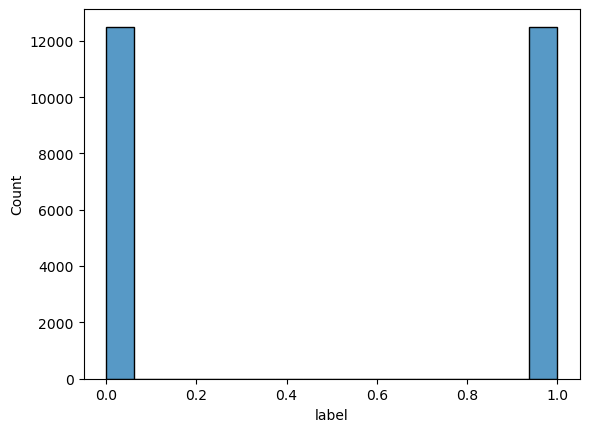

In [7]:
# Visualizing distributions of labels 

sns.histplot(data=data['label'])

There is an equal amount of positive and negative labels. 

### Data Preprocessing

1. Removing `<br />` HTML tags (must be done before removing punctuation to ensure `<>` isn't removed)

In [8]:
def clean_br_tags(text):

    cleaned_text = re.sub(r"(?:<br\s*/?>)+", " ", text, flags=re.IGNORECASE)
    return cleaned_text.strip()

In [9]:
data['preprocessed_text'] = data['text'].apply(clean_br_tags)
tester['preprocessed_text'] = tester['text'].apply(clean_br_tags)

2. Replacing punctuation with empty space instead of completely removing to ensure separate words dont combine into one word because of improper punctuation spacing
   - Example: `....having a good day.I enjoyed.....` would result in the word `dayI` if `.` was just removed
   - Exception: apostrophes are removed to ensure possessives and contractions remain (`don't` -> `dont` instead of `don't` -> `don t`)

In [10]:
def remove_punctuation(text):
    trans_dict = {p: ' ' for p in string.punctuation if p != "'"}
    trans_dict["'"] = None
    tab = str.maketrans(trans_dict) 
    text = text.translate(tab)
    return text

In [11]:
data['preprocessed_text'] = data['preprocessed_text'].apply(lambda x: remove_punctuation(x))
tester['preprocessed_text'] = tester['preprocessed_text'].apply(lambda x: remove_punctuation(x))

3. Standardizing to lower case 

In [12]:
data['preprocessed_text'] = data['preprocessed_text'].apply(lambda x: x.lower())
tester['preprocessed_text'] = tester['preprocessed_text'].apply(lambda x: x.lower())

In [13]:
# Checking final preprocessed data 

data

,text,label,preprocessed_text
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,i rented i am curious yellow from my video sto...
1,"""I Am Curious: Yellow"" is a risible and preten...",0,i am curious yellow is a risible and preten...
2,If only to avoid making this type of film in t...,0,if only to avoid making this type of film in t...
3,This film was probably inspired by Godard's Ma...,0,this film was probably inspired by godards mas...
4,"Oh, brother...after hearing about this ridicul...",0,oh brother after hearing about this ridicul...
...,...,...,...
24995,A hit at the time but now better categorised a...,1,a hit at the time but now better categorised a...
24996,I love this movie like no other. Another time ...,1,i love this movie like no other another time ...
24997,This film and it's sequel Barry Mckenzie holds...,1,this film and its sequel barry mckenzie holds ...
24998,'The Adventures Of Barry McKenzie' started lif...,1,the adventures of barry mckenzie started life ...


The whole dataset has 25000 rows, I will be selecting 1000 rows for further analysis to avoid long computing times. 

In [14]:
data = data.sample(n=1000)

In [15]:
# Saving preprocessed data and tester data to directory

data.to_csv(os.path.join(data_dir, 'data_preprocessed.csv'), index=False)
tester.to_csv(os.path.join(data_dir, 'tester_data.csv'), index=False)